# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [22]:
df = pd.read_csv('C:/Users/lydia/OneDrive/Escritorio/Bootcamp/Machine_Learning/2-No_Supervisado/1-PCA/Practica/data/comprar_alquilar.csv')
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [24]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [25]:
#Crear variables para columnas con datos continuos y discretos

df_cont = df.iloc[:, :-4]
df_disc = df.iloc[:, -4:]

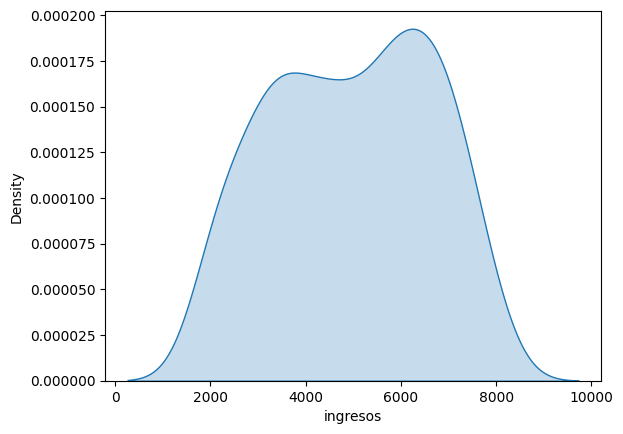

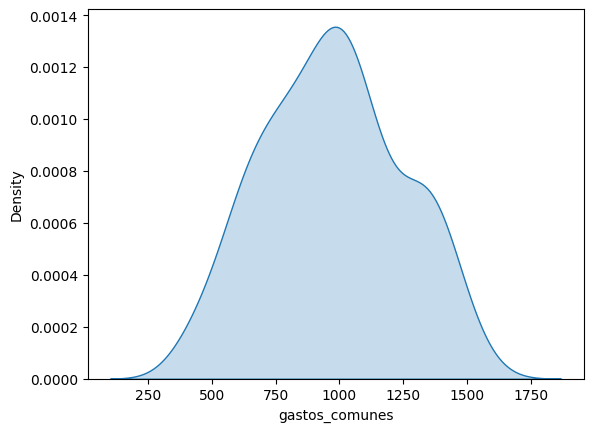

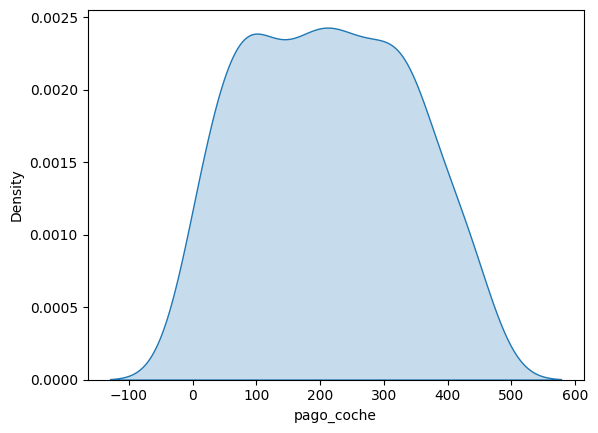

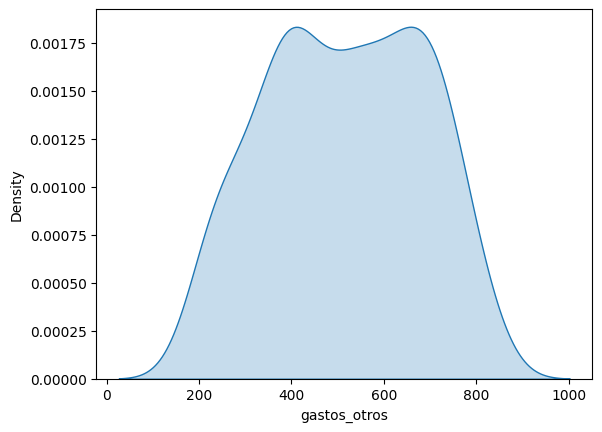

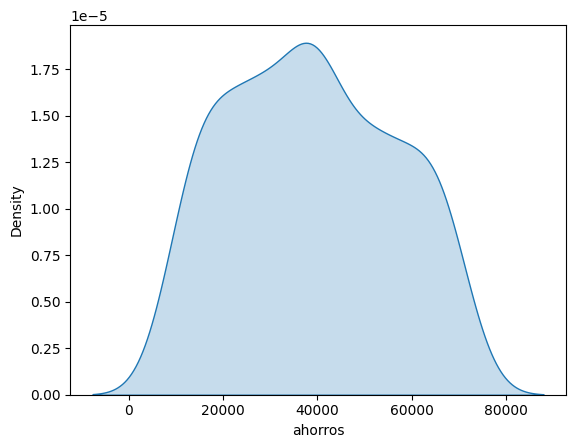

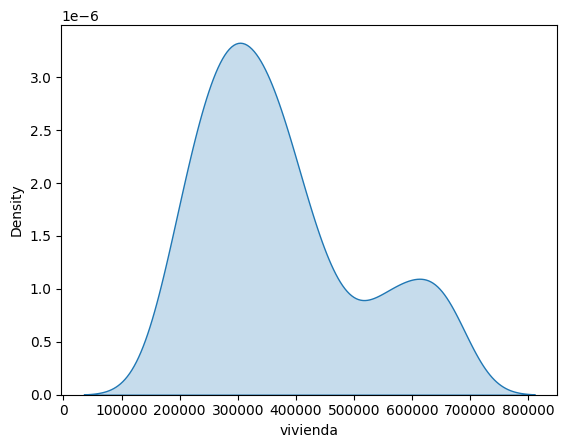

In [26]:
#Graficar los datos continuos

def dens_uni(df_cont):
    '''
    Función que grafica la densidad de todas las columnas numéricas con un gráfico lineal. 
    '''
    num_cols = df_cont.select_dtypes(include=["int64", "float64"])
    for col in num_cols:
        sns.kdeplot(df_cont[col], shade=True)
        sns.color_palette("husl",5)
        plt.xlabel(col)
        plt.show()
    return df_cont

df_cont = dens_uni(df_cont)

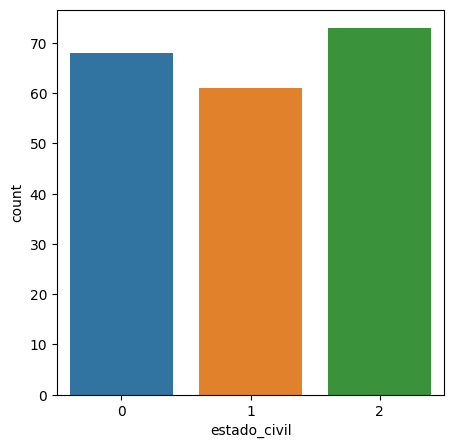

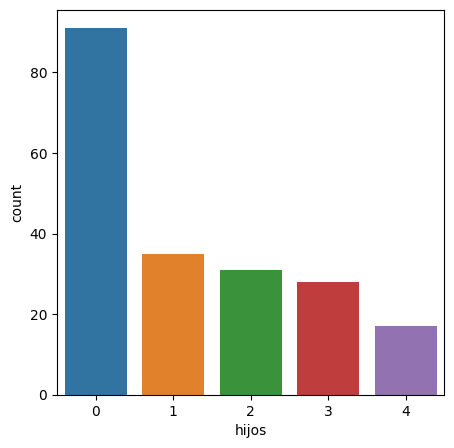

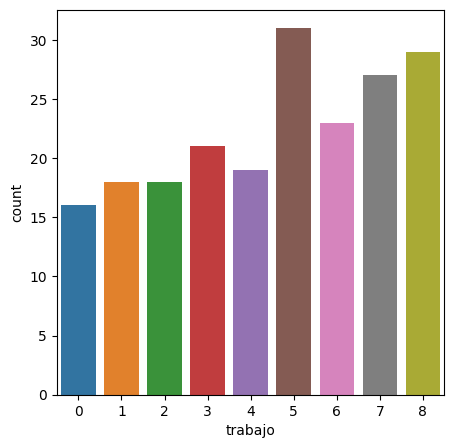

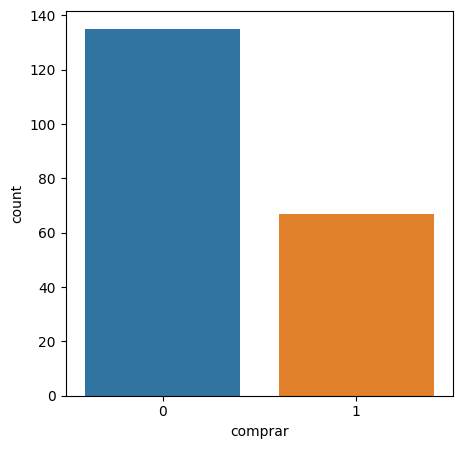

In [31]:
#Graficamos los datos discretos

def barra_uni(df_disc):
    '''
    Función que grafica las columnas dadas en una grafica de barras. 
    '''
    for col in df_disc:
        plt.figure(figsize=(5,5))
        sns.countplot(x=df_disc[col], data=df_disc)

    return df_disc

df_disc = barra_uni(df_disc)

In [32]:
#Los datos del target no parecen estar balanceados, comprobemos.

df.comprar.value_counts()

0    135
1     67
Name: comprar, dtype: int64

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [41]:
#Dividimos en X e y

X = df.drop('comprar',axis = 1)
y = df['comprar'].copy

In [43]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [44]:
pca = PCA(n_components=9)

#Aplicamos PCA a los datos escalados
pca.fit(scaled_X)

PCA(n_components=9)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [45]:
#Varianza explicada por componente

var_exp = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(var_exp):
    print("PC{}: {:.2%}".format(i+1, var))

Varianza explicada por cada componente principal:
PC1: 29.91%
PC2: 23.29%
PC3: 11.71%
PC4: 10.69%
PC5: 9.64%
PC6: 5.63%
PC7: 4.15%
PC8: 3.02%
PC9: 1.97%


In [46]:
#Varianza acumulada desde PC1

var_acumulada = np.cumsum(var_exp)
print("Varianza explicada acumulada:")
for i, cum_var in enumerate(var_acumulada):
    print("PC{}: {:.2%}".format(i+1, cum_var))

Varianza explicada acumulada:
PC1: 29.91%
PC2: 53.21%
PC3: 64.92%
PC4: 75.61%
PC5: 85.24%
PC6: 90.87%
PC7: 95.02%
PC8: 98.03%
PC9: 100.00%


In [47]:
#Varianza explicada en solo 5 componentes

var_5_comp = np.sum(var_exp[:5])
print("Varianza explicada por los primeros 5 componentes:")
print("{:.2%}".format(var_5_comp))

Varianza explicada por los primeros 5 componentes:
85.24%


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

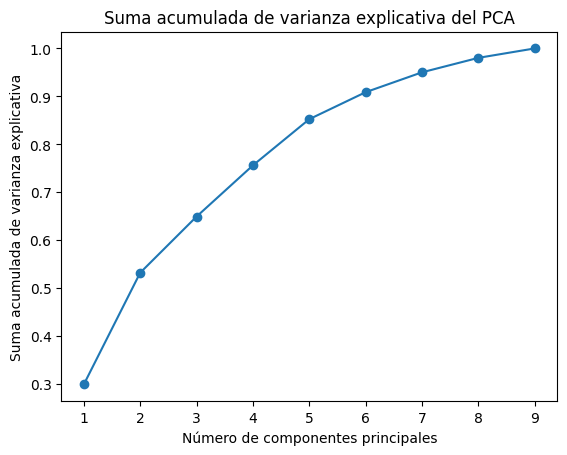

In [48]:
# Diagrama de líneas
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Suma acumulada de varianza explicativa')
plt.title('Suma acumulada de varianza explicativa del PCA')
plt.show();

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

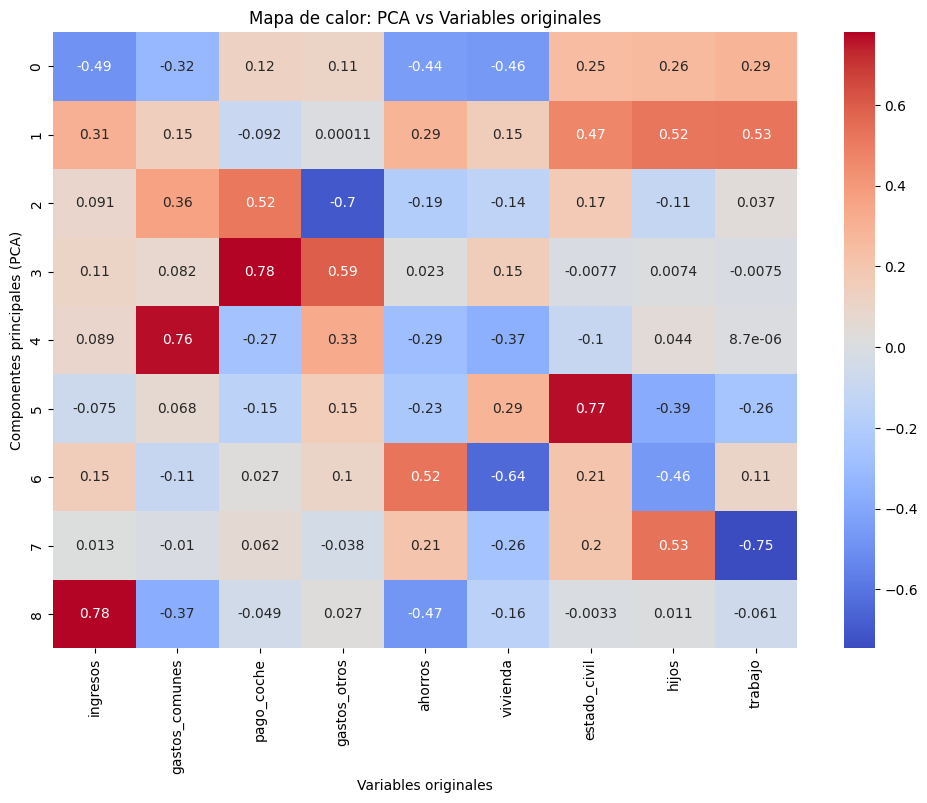

In [52]:
# Variable con los componentes principales
pca_components = pca.components_

# Dataframe con los valores de los componentes principales
df_components = pd.DataFrame(pca_components, columns=X.columns)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_components, cmap='coolwarm', annot=True,)
plt.title("Mapa de calor: PCA vs Variables originales")
plt.xlabel("Variables originales")
plt.ylabel("Componentes principales (PCA)")
plt.show();

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [64]:
#Ya definimos la y, pero estaba desbalanceada. La balanceamos mediante oversampling.
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(scaled_X, y)

# Verificar los conteos de la columna target después del sobremuestreo
print(y_resampled.value_counts())

ValueError: Expected array-like (array or non-string sequence), got <bound method NDFrame.copy of 0      1
1      0
2      1
3      0
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: comprar, Length: 202, dtype: int64>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=42)

TypeError: Singleton array array(<bound method NDFrame.copy of 0      1
1      0
2      1
3      0
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: comprar, Length: 202, dtype: int64>, dtype=object) cannot be considered a valid collection.

Guarda el modelo

In [ ]:
import pickle
